# Resolvendo numericamente equações diferenciais com R

*Esta é uma breve descrição do que é integração numérica e um tutorial prático de como fazê-la em R.*

## Software necessário
### R
*Para executar os códigos R deste notebook em seu próprio computador, você precisa instalar o seguinte software:*

* [R](http://www.r-project.org/), juntamente com os pacotes do [CRAN](http://cran.r-project.org/):
  * [deSolve](http://www.vps.fmvz.usp.br/CRAN/web/packages/deSolve/index.html), uma biblioteca para resolver equações diferenciais
  * [ggplot2](http://www.vps.fmvz.usp.br/CRAN/web/packages/ggplot2/index.html), uma biblioteca para plotagem
  * [reshape2](http://cran.r-project.org/web/packages/reshape2/index.html), para manipular data.frames

Para instalar o R, baixe-o de sua página inicial (Windows ou Mac): http://www.r-project.org/. No Linux, você pode instalá-lo usando a maneira preferida de sua distribuição, por exemplo:

* Debian/Ubuntu: `sudo apt-get install r-base`
* Fedora: `sudo yum install R`
* Arch: `sudo pacman -S r`

Para instalar os pacotes, tudo o que você precisa fazer é executar o seguinte no prompt `R`

    install.packages(c("deSolve", "ggplot2", "reshape2"))
 
O código R apresentado aqui e alguns exemplos adicionais estão disponíveis em https://github.com/diogro/ode_examples (obrigado, [Diogro](https://github.com/diogro)!).

### Executando comandos este notebook
Você pode executar os comandos neste notebook diretamente no R de duas maneiras:
* Copie os trechos de códigos R neste notebook e cole-os no prompt R. Alternativamente, você pode salvá-los em um arquivo de texto puro com extensão .r ou .R e executá-los diretamente em um shell R, ou do R Studio.
* Baixe o [script R]() e execute os comandos em um shell R.

### Executando comandos R do Jupyter
Este tutotial está em um Jupyter notebook, uma interface que combina texto e comandos em várias liguagens, e executa os comandos, se você tiver as linguagens instaladas em seu computador.  *Para executar os comandos R neste notebook a partir de IP[y], você também precisa:*

* A interface [Jupyter notebook](http://jupyter.readthedocs.org/en/latest/install.html) e
* o [R Kernel para Jupyter](http://irkernel.github.io/).

Para instalar o notebook no Windows e Mac, recomendamos instalar a [distribuição Anaconda](https://store.continuum.io/cshop/anaconda/), disponível em http://continuum.io/downloads. No Linux, ele deve estar disponível nos repositórios da sua distribuição.

Para instalar o Kernel do R no Jupyter notebook siga as instruções que estão em http://irkernel.github.io/

### Executando da web
Se por algum motivo você não quiser instalar nada em seu computador, você pode usar um serviço que executa notebooks na nuvem, por exemplo, [SageMathCloud](https://cloud.sagemath.com/) ou [wakari](https://www.wakari.io/). É possível visualizar notebooks disponíveis publicamente em http://nbviewer.ipython.org, mas nenhum cálculo pode ser realizado (apenas mostra os resultados pré-calculados salvos).

## Como funciona a integração numérica

Digamos que temos uma equação diferencial que não sabemos (ou não queremos) derivar sua solução (analítica). Ainda podemos descobrir quais são as soluções por meio da **integração numérica**. Então, como isso funciona?

A ideia é aproximar a solução em pequenos intervalos de tempo sucessivos, extrapolando o valor da derivada em cada intervalo. Por exemplo, vamos tomar a equação diferencial

$$ \frac{dx}{dt} = f(x) = x (1 - x) $$

com um valor inicial $x_0 = 0.1$ em um momento inicial $t=0$ (ou seja, $x(0) = 0.1$). Em $t=0$, a derivada $\frac{dx}{dt}$ é igual a  $f(0.1) = 0.1 \times (1-0.1) = 0.09$. Escolhemos um pequeno passo de tempo, digamos, $\Delta t = 0.5$, e assumimos que esse valor da derivada é uma boa aproximação ao longo de todo este pequeno intervalo de $t=0$ até $t=0.5$. Isso significa que neste tempo $x$ vai aumentar $\frac{dx}{dt} \times \Delta t = 0.09 \times 0.5 = 0.045$. Portanto, nossa solução aproximada para $x$ em $t=0.5$ é $x(0) + 0.045 = 0.145$. Podemos então usar este valor de $x(0.5)$ para calcular o próximo ponto no tempo, $t=1$. Em resumo, calculamos a derivada em cada passo, multiplicando o resultado da derivada pelo passo de tempo, e aí somamos o resultado ao valor anterior da solução, conforme tabela abaixo:


| $t$ | $x$      | $\frac{dx}{dt}$  |
| ---:|---------:|----------:|
| 0   | 0.1      |  0.09     |
| 0.5 | 0.145    |  0.123975 |
| 1.0 | 0.206987 |  0.164144 |
| 1.5 | 0.289059 |  0.205504 |
| 2.0 | 0.391811 |  0.238295 |

Claro, isso é terrivelmente tedioso de fazer à mão, então podemos escrever um programa simples para fazer isso e fazer um gráfico  da solução. Abaixo, comparamos com a solução que obtivemos na tabela acima com intervalos de tempo $0.1$ com a solução analítica conhecida desta equação diferencial (a *equação logística*). **Não se preocupe com o código ainda**: existem maneiras melhores e mais simples de fazer isso! Os pontos são os valores aproximados para alguns momentos, e a linha mostra a solução analítica.

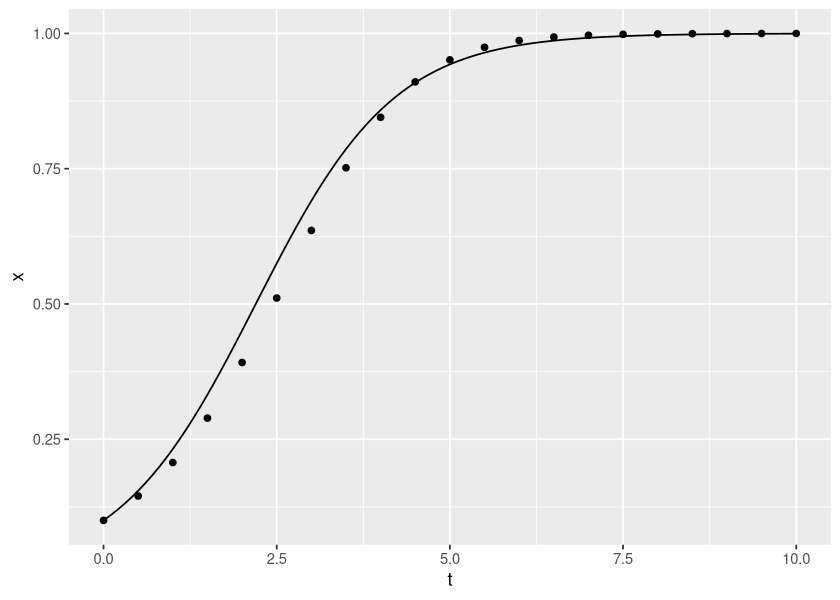

In [46]:
# intervalos de tempo: uma sequência de zero a dez em passos de 0,5
time <- seq(0, 10, by = 0.5)
# condição inicial
x0 <- 0.1
## A função a ser integrada (expressão à direita da derivada acima)
f <- function(x){x * (1.-x)}
## Um vetor vazio para armazenar os resultados
x <- c()
## Armazena a condição inicial na primeira posição do vetor
x[1] <- x0


# loop ao longo do tempo: aproxima a função a cada passo de tempo
for (i in 1:(length(time)-1)){
    x[i+1] = x[i] + 0.5 * f(x[i])
}

## plotando com ggplot2
library(ggplot2)#carrega cada biblioteca uma vez por sessão R
p <- ggplot(data = data.frame(x = x, t = time), aes(t, x)) + geom_point()
analytic <- stat_function(fun=function(t){0.1 * exp(t)/(1+0.1*(exp(t)-1.))})
print(p+analytic)

## Por que usar bibliotecas científicas?

O método que acabamos de usar acima é chamado de *método de Euler* e é o mais simples disponível. O problema é que, embora funcione razoavelmente bem para a equação diferencial acima, em muitos casos não funciona muito bem. Há muitas maneiras de melhorá-lo: de fato, existem muitos livros inteiramente dedicados a isso. Embora muitos estudantes de matemática ou física aprendam a implementar métodos mais sofisticados, o tópico é realmente profundo. Felizmente, podemos contar com a experiência de muitas pessoas que já criaram bons algoritmos que funcionam bem na maioria das situações. Estes algoritmos estão já disponíveis na maioria das linguagens de programação. Aqui vamos usar uma ótima implementação disponível em R.

## Então, como... ?

Vamos demonstrar como usar bibliotecas científicas para integrar equações diferenciais. Embora os comandos específicos dependam do software, o procedimento geral é geralmente o mesmo:

1. Defina os valores dos parâmetros e a condição inicial 
2. Escolha um intervalo de tempo ou uma sequência de tempos em que deseja a solução calculada
3. Definir a função derivada na linguagem computacional (o lado direito da equação diferencial)
4. passar a função, seqüência de tempo, parâmetros e condições iniciais para uma rotina de computador que executa a integração.

### Uma única equação

Então, vamos começar com a mesma equação acima, a equação logística, agora expressa com os parâmetros para taxa de crescimento ($r$) e capacidade de carga ($K$):

$$ \frac{dx}{dt} = f(x) = r x \left(1 - \frac{x}{K} \right) $$

E vamos usar o caso em que  $r=2$, $K=10$ e a condição inicial $x(0) = 0.1$. Mostramos como integrá-lo usando R abaixo:

#### 1. Defina os valores dos parâmetros e condição inicial

In [47]:
# paramentros: devem estar em um vetor
parameters <- c(r = 1.5, K = 10)

# condições iniciais: também devem estar em um vetor, mesmo que seja um só valor
state <- c(x = 0.1)

#### 2. Escolha um intervalo de tempo ou uma sequência de tempos em que deseja a solução calculada
Note que estes são momentos no tempo para os quais você quer a solução. **Não são os intervalos de integração**, que são definidos internamente pela função de integração.

In [48]:
## seqüência de tempo
time <- seq(from=0, to=10, by = 0.01)

#### 3. Defina uma função em R para a EDO ser integrada

Vamos definir uma função em R para o lado direito da equação diferencial.
Para esta função ser reconhecida pelas rotinas de integração da biblioteca que vamos usar (*deSolve*), esta função em R deve calculas os valores da derivada em um tempo $t$.
Há muitas maneiras de fazer isso, mas o formato recomendado é:
* Faça uma função com três argumentos: seqüência de tempo, variáveis ​​de estado e parâmetros, nesta ordem.
* A função deve retornar uma lista com resultados da função a ser integrada.
Para fazer isso use `with(as.list(c(state, parameters){ ... }` dentro da função R.
Inclua entre parênteses a(s) função(ões) a ser(em) integrada(s)
e então feche retornando a lista dos valores calculados.

In [49]:
## A ODE logística a ser integrada
logistic <- function(t, state, parameters){
    with(
        as.list(c(state, parameters)),{
            dx <- r*x*(1-x/K)
            return(list(dx))
        }
        )
}

#### 4. Integrar a função

Agora chame a função da  biblioteca "deSolve"  `ode`. Para realizar a integração, os argumentos básicos da função  'ode' são
* `y`: o vetor de condições iniciais
* `times`: o vetor com a sequência de tempo
* `func`: a função R como descrito acima
* `parms`: vetor de valores de parâmetro (nomeado)

In [50]:
library(deSolve)# Carrega a biblioteca para integração, basta chamar uma vez por seção do R
## Executa a integração
out <- ode(y = state, times = time, func = logistic, parms = parameters)

O objeto resultante tem os valores da integração
em cada ponto de tempo no vetor de tempos

In [51]:
head(out) # primeiras 6 linhas

time,x
0.00,0.1000000
0.01,0.1014960
0.02,0.1030141
0.03,0.1045547
0.04,0.1061181
0.05,0.1077046


Que podemos plotar

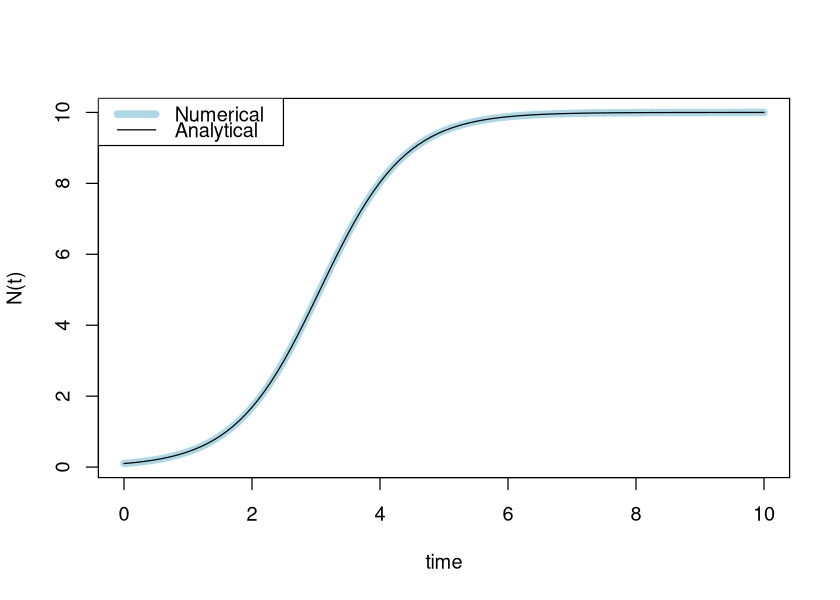

In [52]:
#### Para o jupyter notebook apenas
options(jupyter.plot_mimetypes = 'image/png', repr.plot.height=5)
####

plot(out, lwd=6, col="lightblue", main="", ylab="N(t)")
curve(0.1*10*exp(1.5*x)/(10+0.1*(exp(1.5*x)-1)), add=TRUE)
legend("topleft", c("Numerical", "Analytical"), lty=1, col=c("lightblue", "black"), lwd=c(6,1))

Temos uma aproximação muito melhor agora, as duas curvas se sobrepõem!
Obtenha o mesmo gráfico com o uso do pacote *ggplot2*:

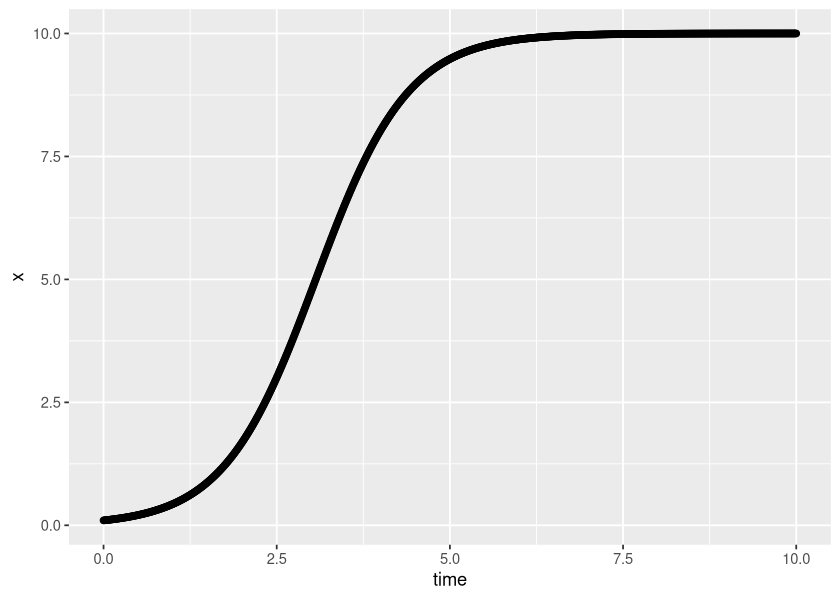

In [53]:
## Plotando com o ggplot2
p <- ggplot(data = as.data.frame(out), aes(time, x)) + geom_point()
analytic <- stat_function(fun=function(t){0.1*10*exp(1.5*t)/(10+0.1*(exp(1.5*t)-1))})
print(p+analytic)

### Um sistema de equações
Agora, e se quiséssemos integrar um sistema de equações diferenciais? Vamos tomar, por exemplo, as equações para o sistema predador-presa de Lotka-Volterra:

$$ \begin{aligned}
\frac{dV}{dt} &= r V - c V P\\
\frac{dP}{dt} &= ec V P - dP
\end{aligned}$$

Tudo o que você precisa fazer é escrever uma função R que retorne os valores de ambas as derivadas, e definir os valores dos parâmetros e das condições iniciais:

#### 1. Defina valores dos parâmetros e condições iniciais

In [54]:
# Paramêtros: vetor
parameters <- c(r = 2, k = 0.5, e = 0.1, d = 1)

# condições iniciais: vetor
state <- c(V = 1, P = 3)

#### 2. Escolha um intervalo de tempo ou uma sequência de tempos em que deseja a solução calculada

In [55]:
# sequência do tempo
time <- seq(0, 50, by = 0.01)

# Paramêtros: vetor
parameters <- c(r = 2, k = 0.5, e = 0.1, d = 1)

# condições iniciais: vetor
state <- c(V = 1, P = 3)

#### 3. Defina uma função em R para o sistema de EDOs a ser integrado

In [56]:
# Função R para calcular o valor das derivadas a cada valor de tempo
# Use os nomes das variáveis conforme definido nos vetores acima
lotkaVolterra <- function(t, state, parameters){
  with(as.list(c(state, parameters)), {
    dV = r * V - k * V * P
    dP = e * k * V * P - d * P
    return(list(c(dV, dP)))
  })
}

#### 4. Integrar a função

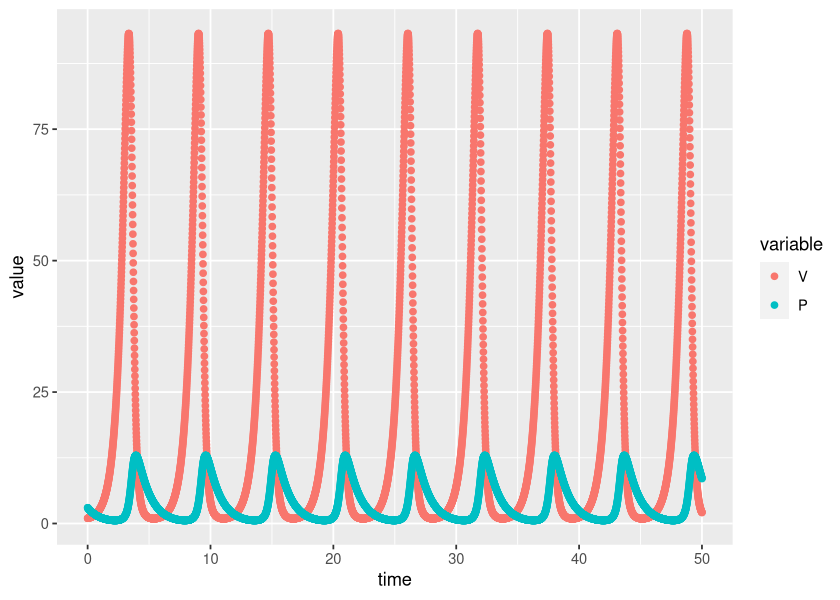

In [57]:
## Integração com'ode'
out <- ode(y = state, times = time, func = lotkaVolterra, parms = parameters)

## Plotando
out.df = as.data.frame(out) # exigido pelo ggplot
library(reshape2)
out.m = melt(out.df, id.vars='time') # isso facilita a plotagem colocando todas as variáveis em uma única coluna

p <- ggplot(out.m, aes(time, value, color = variable)) + geom_point()
print(p)

Uma coisa interessante a se fazer aqui é dar uma olhada no *espaço de fase*, ou seja, plotar apenas as variáveis dependentes ( nocao número de presas e de predadores em cada momento). Note que no espaço de fase o tempo está implícito. Para torná-lo um pouco mais explícito, usamos um código de cores, para mostrar em que sentido cada para de valores segue-se a outro no tempo:

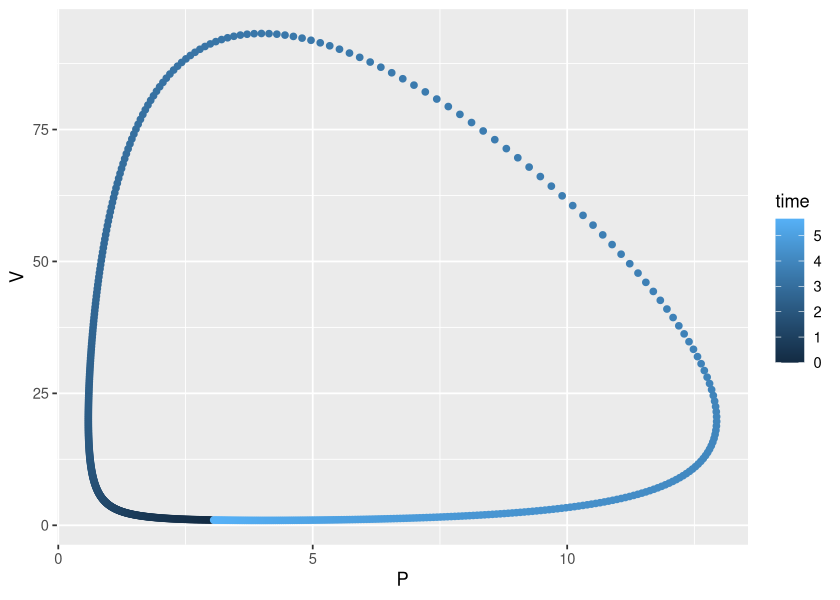

In [58]:
p2 <- ggplot(data = out.df[1:567,], aes(x = P, V, color = time)) + geom_point()
print(p2)


**Parabéns**: agora você tem os elementos básicos para integrar qualquer sistema de equações diferenciais!

### Mais informações

* [Introduction to R](cran.r-project.org/doc/manuals/R-intro.html)
* [Crash course in R](http://www.r-bloggers.com/a-crash-course-in-r/)
* [ode package](http://desolve.r-forge.r-project.org/)
* [Some additional example codes](https://github.com/diogro/ode_examples)
* [ggplot2 package](http://ggplot2.org/)
* [A R graph gallery](http://www.sr.bham.ac.uk/~ajrs/R/r-gallery.html)
* [Another tutorial on numerical integration in R](http://www.r-bloggers.com/learning-r-parameter-fitting-for-models-involving-differential-equations/)